In [26]:
%pylab inline
from scipy.linalg import cholesky

Populating the interactive namespace from numpy and matplotlib


In [9]:
def homogeneous_sphere(n_dots):
    phi = random.rand(n_dots) * 2*pi
    theta = random.rand(n_dots) * 2 - 1
    R = random.rand(n_dots)
    X = R**(1/3.) * sin(phi) * sin(arccos(theta))
    Y = R**(1/3.) * cos(phi) * sin(arccos(theta))
    Z = R**(1/3.) * theta
    return X, Y, Z

(-1.5, 1.5, -1.5, 1.5)

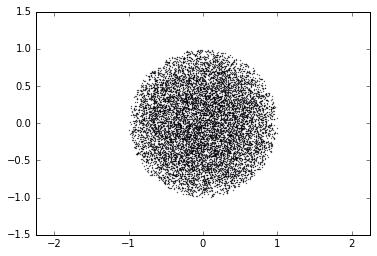

In [61]:
x, y, z = homogeneous_sphere(10000)

scatter(y, z, s=0.1)
axis('equal')

In [21]:
def A_matrix(a, b, c):
    A = np.zeros((3, 3))
    A[0][0] = 1/float(a)**2
    A[1][1] = 1/float(b)**2
    A[2][2] = 1/float(c)**2
    return A

In [27]:
def B_matrix(A):
    B = cholesky(A, lower=True)
    return B, B.T
    

In [35]:
A_t = A_matrix(2, 1, 1)
b, b_t = B_matrix(A_t)

In [55]:
def ellipse_gen(xyz, a, b, c):
    A = A_matrix(a, b, c)
    B, B_t = B_matrix(A)
    xyz_ellipse = np.zeros((len(xyz),3))
    for i in range(len(xyz)):
        xyz_ellipse[i] = np.dot(inv(B_t),xyz[i])
    return xyz_ellipse

In [62]:
xyz = np.zeros((10000, 3))
xyz[:,0] = x
xyz[:,1] = y
xyz[:,2] = z

In [63]:
xyz_ellipse = ellipse_gen(xyz, 2, 1, 1)

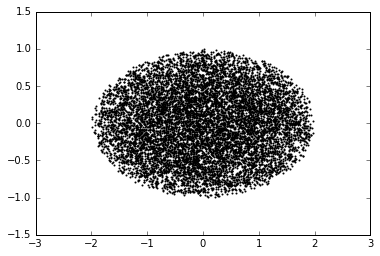

In [65]:
scatter(xyz_ellipse[:,0], xyz_ellipse[:,1], s=1)

## references:

 
    
- sec 2.5.5 of: http://onlinelibrary.wiley.com/book/10.1002/9780470230381;jsessionid=BA9E71D3879A6C94AAD91FC044CA74B1.f02t02

- https://www.quantstart.com/articles/Cholesky-Decomposition-in-Python-and-NumPy

- http://www.math.washington.edu/~king/coursedir/m308a01/Projects/m308a01-pdf/brown.pdf
